In [12]:
import pandas as pd

df = pd.read_excel('excel/coupang2024.xlsx')
df

,주문일,상품명,가격,카테고리
0,2023-12-21 08:09:34,켈로그 프로틴 그래놀라 쉐이크 미숫가루,"19,900",음식 및 음료
1,2023-12-21 08:09:34,쿠크다스 케이크,"13,020",음식 및 음료
2,2023-12-21 08:09:34,미주라 통밀도넛츠 2p + 초코칩 통밀도넛츠 2p,"17,500",음식 및 음료
3,2023-12-21 08:09:34,곰곰 간편한 미숫가루 스틱,"16,300",음식 및 음료
4,2023-12-21 08:09:34,농심 짜파게티 범벅 70g,"5,040",음식 및 음료
...,...,...,...,...
403,2023-01-09 01:10:56,카누 다크로스트 아메리카노 원두커피믹스,"16,340",음식 및 음료
404,2023-01-08 03:56:31,고르고 바른 마스크 대형,"7,900",장비 및 생활용품
405,2023-01-05 02:42:00,공차 허니자몽블랙티,"7,380",음식 및 음료
406,2023-01-05 02:42:00,ipTIME USB허브 UC304,"14,240",장비 및 생활용품


In [13]:
df['주문일'] = pd.to_datetime(df['주문일'])
df = df[df['주문일'].dt.year != 2025]
print(df)

                    주문일                          상품명      가격       카테고리
0   2023-12-21 08:09:34        켈로그 프로틴 그래놀라 쉐이크 미숫가루  19,900    음식 및 음료
1   2023-12-21 08:09:34                     쿠크다스 케이크  13,020    음식 및 음료
2   2023-12-21 08:09:34  미주라 통밀도넛츠 2p + 초코칩 통밀도넛츠 2p  17,500    음식 및 음료
3   2023-12-21 08:09:34               곰곰 간편한 미숫가루 스틱  16,300    음식 및 음료
4   2023-12-21 08:09:34               농심 짜파게티 범벅 70g   5,040    음식 및 음료
..                  ...                          ...     ...        ...
403 2023-01-09 01:10:56        카누 다크로스트 아메리카노 원두커피믹스  16,340    음식 및 음료
404 2023-01-08 03:56:31                고르고 바른 마스크 대형   7,900  장비 및 생활용품
405 2023-01-05 02:42:00                   공차 허니자몽블랙티   7,380    음식 및 음료
406 2023-01-05 02:42:00           ipTIME USB허브 UC304  14,240  장비 및 생활용품
407 2023-01-05 02:42:00        알티스트 핫초코 한잔에 당분이 단 1g   8,900    음식 및 음료

[408 rows x 4 columns]


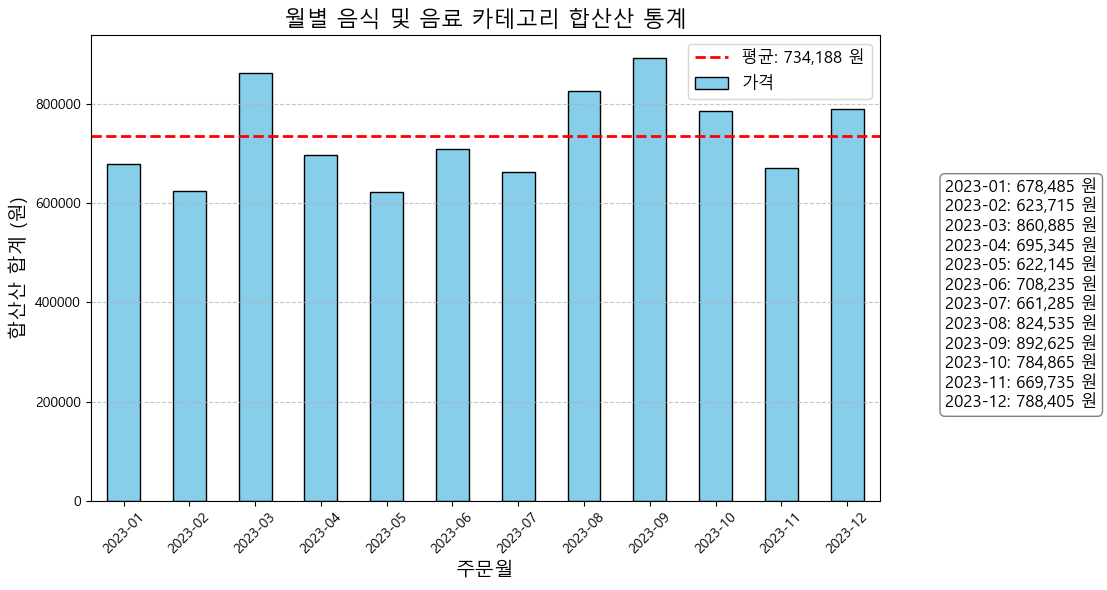

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 

# '가격' 열을 숫자형으로 변환
df.loc[:, '가격'] = df['가격'].replace(',', '', regex=True).astype(int)

# '음식 및 음료' 카테고리 필터링 후 복사본 생성
food_df = df[df['카테고리'] == '음식 및 음료'].copy()

# '주문월' 열 추가
food_df['주문월'] = food_df['주문일'].dt.to_period('M')

# 월별 합계 계산
monthly_stats = food_df.groupby('주문월')['가격'].sum()

# 6024840 / 12 계산
value_to_add = 6024840 / 12

# 각 월 값에 더하기(스타벅스)
monthly_stats = monthly_stats + value_to_add

# 평균값 계산
average_value = monthly_stats.mean()

# 한글 폰트 설정
rc('font', family='Malgun Gothic')  # Windows의 경우 'Malgun Gothic'

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
monthly_stats.plot(kind='bar', color='#7d8eec', edgecolor='black', ax=ax)
ax.set_title('월별 음식 및 음료 카테고리 합산산 통계', fontsize=16)
ax.set_xlabel('주문월', fontsize=14)
ax.set_ylabel('합산산 합계 (원)', fontsize=14)
ax.set_xticklabels(monthly_stats.index.astype(str), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 월별 통계치를 그래프 옆에 표시
stats_text = "\n".join([f"{month}: {value:,.0f} 원" for month, value in monthly_stats.items()])
fig.text(0.95, 0.5, stats_text, fontsize=12, va='center', ha='left', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

# 평균값 수평선 추가
ax.axhline(average_value, color='red', linestyle='--', linewidth=2, label=f'평균: {average_value:,.0f} 원')

# 범례 추가
ax.legend(fontsize=12)

# 그래프 저장
plt.tight_layout(rect=[0, 0, 0.9, 1])  # 그래프와 텍스트 간격 조정
plt.savefig('graph/monthly_food_with_stats.png', dpi=300, bbox_inches='tight')

plt.show()


C:\Users\tlsek\AppData\Local\Temp\ipykernel_3804\1586923606.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, '가격'] = df['가격'].replace(',', '', regex=True).astype(int)


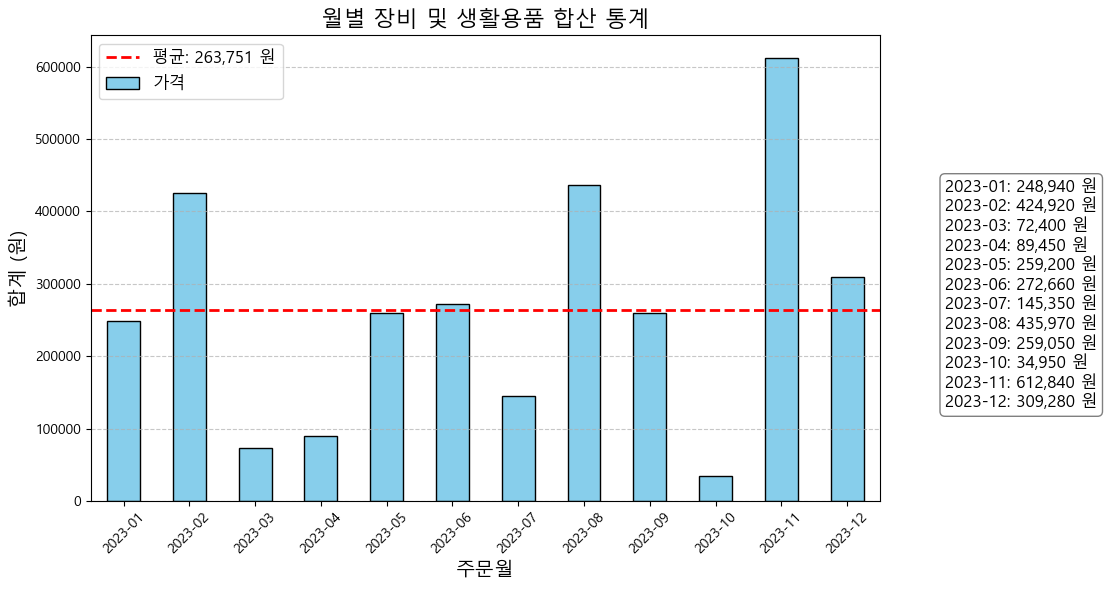

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 

# '가격' 열을 숫자형으로 변환
df.loc[:, '가격'] = df['가격'].replace(',', '', regex=True).astype(int)

# '음식 및 음료' 카테고리 필터링 후 복사본 생성
life_df = df[df['카테고리'] == '장비 및 생활용품'].copy()

# '주문월' 열 추가
life_df['주문월'] = life_df['주문일'].dt.to_period('M')

# 월별 합계 계산
monthly_stats = life_df.groupby('주문월')['가격'].sum()

# 평균값 계산
average_value = monthly_stats.mean()

# 한글 폰트 설정
rc('font', family='Malgun Gothic')  # Windows의 경우 'Malgun Gothic'

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
monthly_stats.plot(kind='bar', color='#7d8eec', edgecolor='black', ax=ax)
ax.set_title('월별 장비 및 생활용품 합산 통계', fontsize=16)
ax.set_xlabel('주문월', fontsize=14)
ax.set_ylabel('합계 (원)', fontsize=14)
ax.set_xticklabels(monthly_stats.index.astype(str), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 월별 통계치를 그래프 옆에 표시
stats_text = "\n".join([f"{month}: {value:,.0f} 원" for month, value in monthly_stats.items()])
fig.text(0.95, 0.5, stats_text, fontsize=12, va='center', ha='left', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

# 평균값 수평선 추가
ax.axhline(average_value, color='red', linestyle='--', linewidth=2, label=f'평균: {average_value:,.0f} 원')

# 범례 추가
ax.legend(fontsize=12)

# 그래프 저장
plt.tight_layout(rect=[0, 0, 0.9, 1])  # 그래프와 텍스트 간격 조정
plt.savefig('graph/monthly_life_sales_with_stats.png', dpi=300, bbox_inches='tight')

plt.show()
